In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("./data/spotify.csv", encoding='latin-1')

In [7]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [8]:
df.shape

(603, 15)

In [9]:
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [11]:
df.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

In [12]:
df.isna().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [14]:
df = df.assign(target =1)

In [15]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,target
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,1
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,1
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,1
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,1
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,1


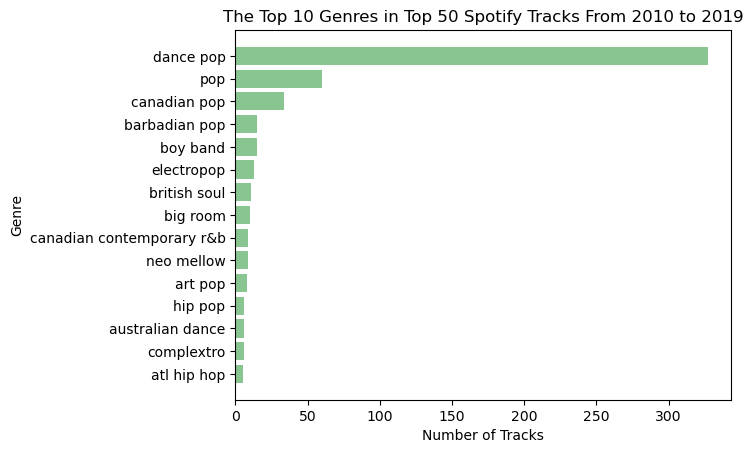

In [40]:
top_genre = df['top genre'].value_counts()
sorted_genre = top_genre.sort_values(ascending=True)

top_ten = sorted_genre.tail(15)

plt.barh(top_ten.index, top_ten.values, color='#88c591')
plt.title('The Top 10 Genres in Top 50 Spotify Tracks From 2010 to 2019')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.show()

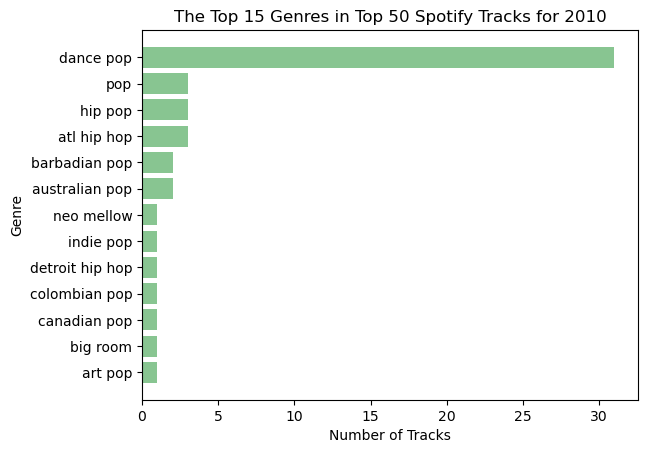

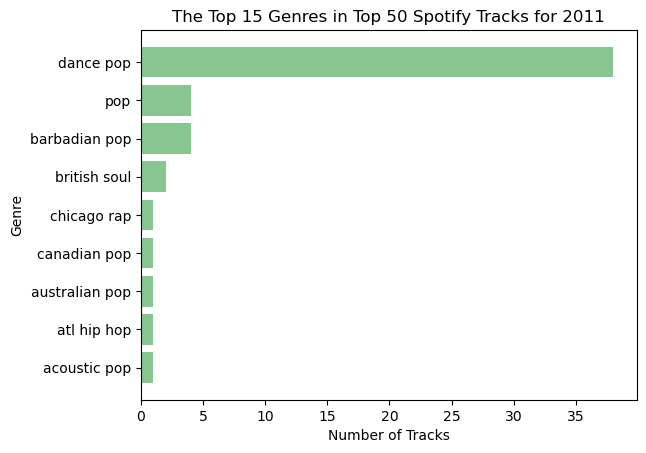

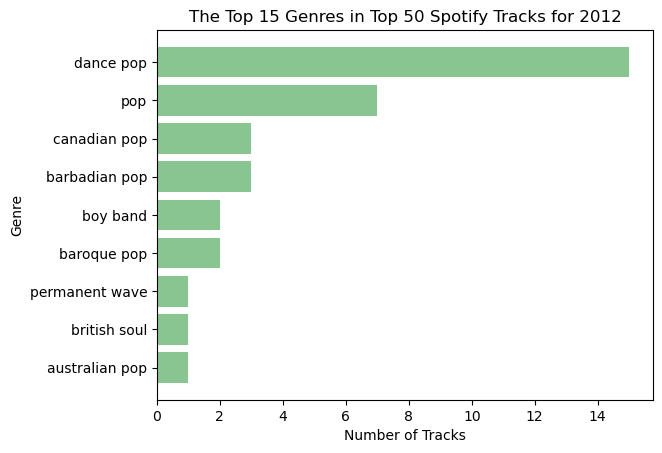

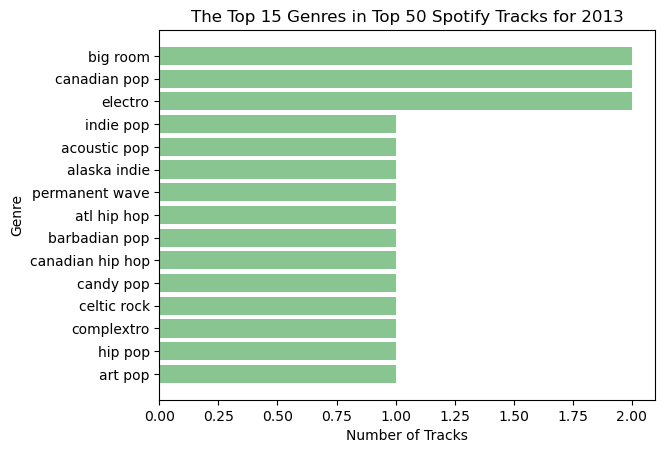

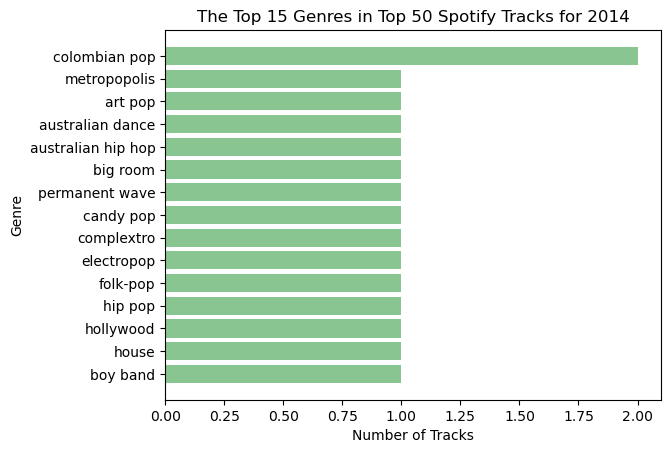

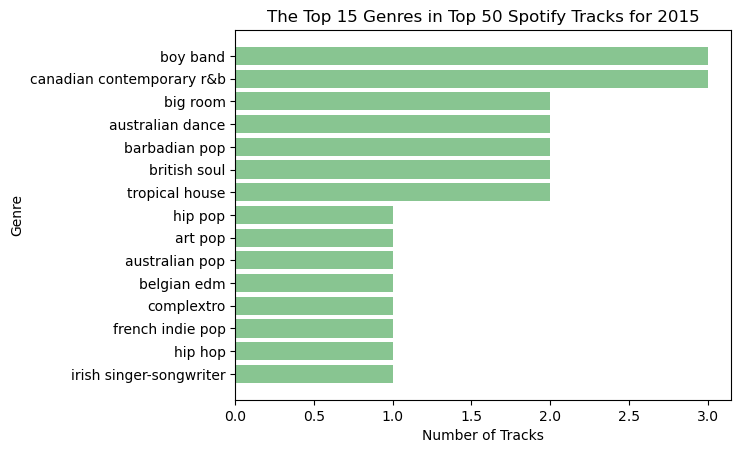

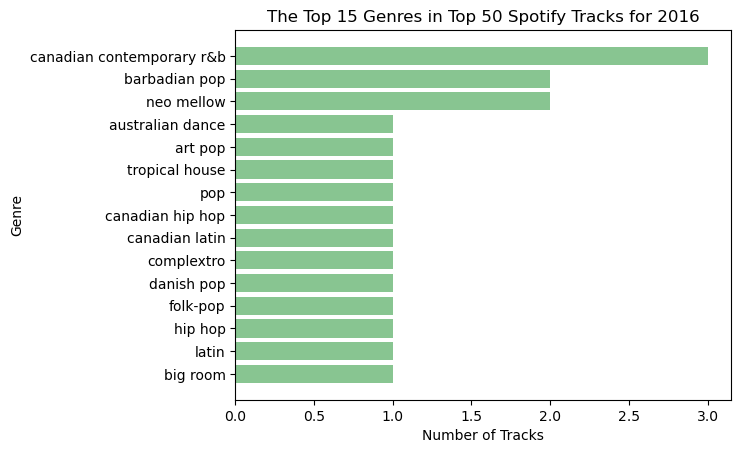

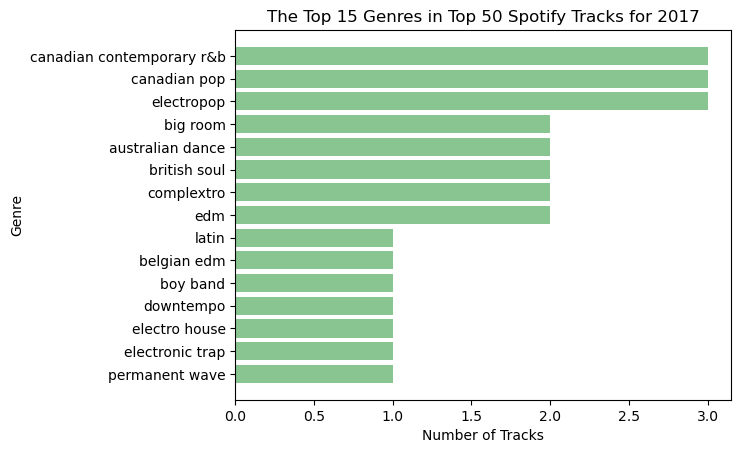

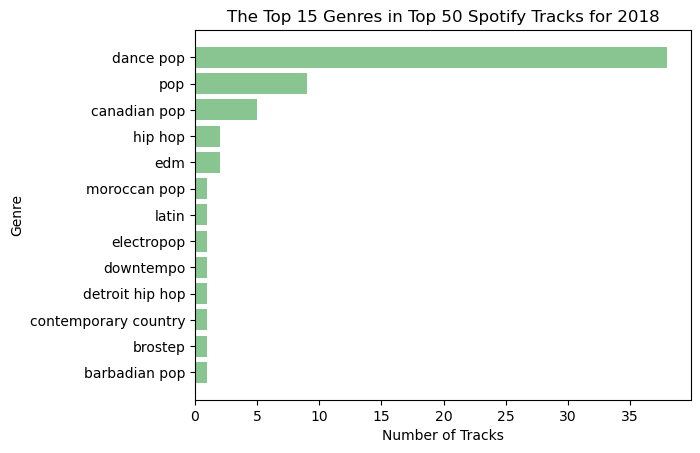

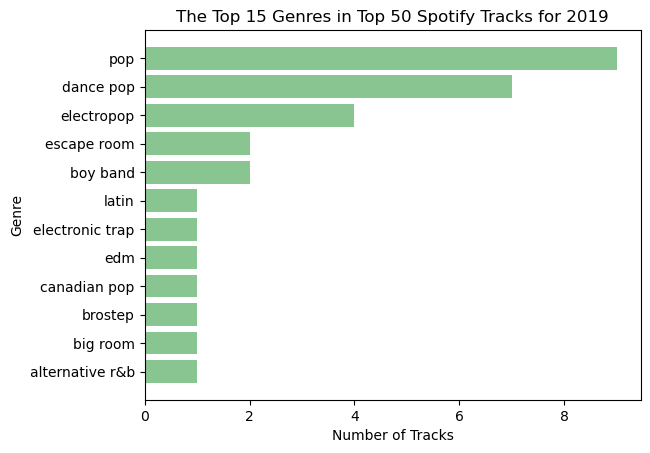

In [41]:
# group the dataframe by year and count the number of occurrences of each genre
genres_by_year = df.groupby('year')['top genre'].value_counts()

# create a horizontal bar chart for each year showing the top ten genres
for year in df['year'].unique():
    top_genres = genres_by_year.loc[year].sort_values(ascending=True).head(15)
    plt.barh(top_genres.index, top_genres.values, color='#88c591')
    plt.title(f'The Top 15 Genres in Top 50 Spotify Tracks for {year}')
    plt.xlabel('Number of Tracks')
    plt.ylabel('Genre')
    plt.show()

### Saving Cleaned table to final CSV

In [16]:
df.to_csv('./data/2019top10.csv', index=False)